You are given a dataset of a company's advertising spend on TV,radio ans Newspapers, the dataset contains the following information :


TV : the amount of money spent on Tv advertisements in USD.
Radio : the amount of money spent on radio advertisements in USD.
Newspaper : the amount of money spent on newspaper advertisements in USD.
Sales : the sales of the company in USD.

Your task is to build a linear regression model is that predict the sales based on the advertising spend on TV,Radio and Newspaper.

The eqution of your linear regressiob model will be the form of $$\\Sales = Theta_0*Theta_1*Tv + Theta_2*Radio + Theta_3*Newspaper $$ 

Tv, Radio and Newspaper are features of the model.

In [2]:
import torch 
import torch.nn as nn 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [149]:
RANDOME_SEED = 45 
torch.manual_seed(RANDOME_SEED)


TV = torch.rand(9)
RADIO = torch.rand(9)
NEWSPAPER = torch.rand(9)

t0,t1, t2, t3 = torch.rand(4)

sales = t0*t1*TV  + t2*RADIO + t3*NEWSPAPER


In [ ]:
features = torch.stack((TV,RADIO,NEWSPAPER),1)

In [159]:
X_train,X_test,Y_train,Y_test = train_test_split(features,
                                                 sales,
                                                 test_size=0.3,
                                                 random_state=RANDOME_SEED
                                                 )

In [154]:
class LinearRegression(nn.Module) :
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3,1)

    def forward(self,x) :
        return self.linear(x)

In [155]:
model = LinearRegression()
loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(),
                            lr = 0.001)

In [182]:
def visualization(training_data = X_train,
                  training_labels = Y_train,
                  testing_data = X_test,
                  testing_labels = Y_test,
                  inference = None) :
    
    plt.figure(figsize=(10,5))       

    plt.scatter(training_data,training_labels, c = "green" , label = "Trainning data")
    plt.scatter(testing_data,testing_labels, c = "red" , label = "Trainning data")
    plt.grid(True,linestyle = "--")

    if inference is not None :
        plt.plot(testing_data,inference, c = "blue", label = "Inference")



(tensor([[0.1869],
         [0.5530],
         [0.5267]]),
 tensor([[0.6834, 0.1037, 0.1826],
         [0.0566, 0.6834, 0.7822],
         [0.9613, 0.0388, 0.9834]]))

In [190]:
epochs = 10000
losses = []
for numbers in range(epochs) :
    model.train()
    optimizer.zero_grad()
    prediction = model(X_train)
    loss = loss_function(prediction,Y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())


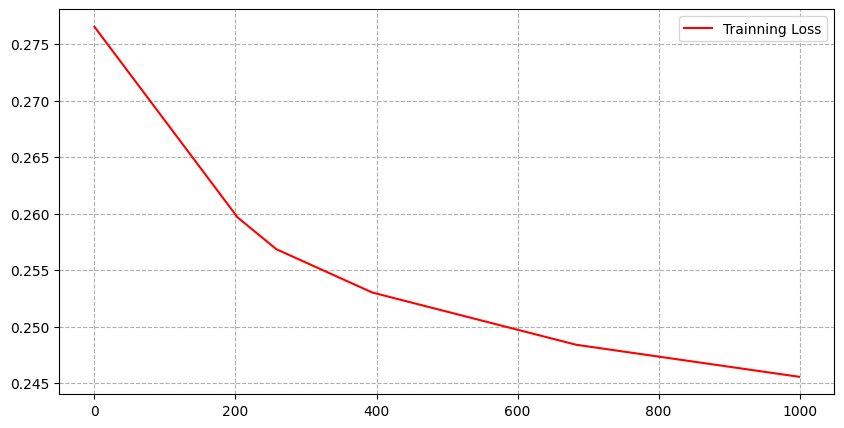

In [189]:
def Train_loss_Visualization() :
    plt.figure(figsize=(10,5))
    plt.plot(losses, c = "red", label = "Trainning Loss")
    plt.grid(True,linestyle = "--")
    plt.legend()

Train_loss_Visualization()

ValueError: x and y must be the same size

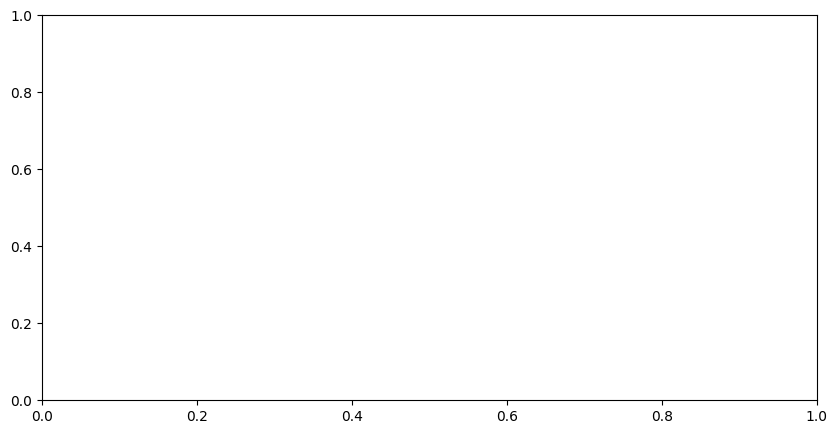

In [184]:
model.eval()

with torch.inference_mode() :
    inference = model(X_test)

visualization(inference = None)